In [139]:
import numpy as np
import pandas as pd

In [140]:
raw_train = pd.read_csv("train.csv")

In [141]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
raw_train.shape

(891, 12)

In [143]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
all_cols = list(raw_train)
num_data = [i for i in list(raw_train) if raw_train[i].dtypes != "object"]
cat_data = [i for i in list(raw_train) if raw_train[i].dtypes == "object"]
print(f"The numerical attributes are: {num_data}")

The numerical attributes are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Convert sex to integer counterparts for more efficient data processing by model

#### convert pandas dataframe to numpy array to pass into the GenderTransformer class

In [146]:
raw_train_arr = raw_train.to_numpy()
raw_train_arr

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], shape=(891, 12), dtype=object)

#### define the GenderTransform class and transform the data

In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

class GenderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X[:, 4]=np.where((X[:, 4] == 'female'), int(0), int(1))
        return X
    



In [148]:
sex_num = GenderTransformer()
raw_train_arr_sex_num = sex_num.transform(raw_train_arr)

In [149]:
corr_matrix = raw_train.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#### reconsturct the pandas dataframe from the transformed numpy array

In [150]:
raw_train_sex_num = pd.DataFrame(raw_train_arr_sex_num, columns=all_cols)
raw_train_sex_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C


#### change to appropriate datatype wherever necessary

In [151]:
def revert_datatype(raw_train_sex_num, int_features_index = [0, 1, 2, 4, 6, 7], float_features_index = [5, 9]):
    for i in int_features_index:
        raw_train_sex_num[all_cols[i]] = raw_train_sex_num[all_cols[i]].astype(np.int64)
    for i in float_features_index:
        raw_train_sex_num[all_cols[i]] = raw_train_sex_num[all_cols[i]].astype(float) 
revert_datatype(raw_train_sex_num)

#### construct the correlation matrix for the transformed data

In [152]:
corr_mat = raw_train_sex_num.corr(numeric_only=True)
corr_mat["Survived"].sort_values(ascending=True)

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

### Transform the Embarked column with OneHotEncoder

#### The approach I am using is:
- Firstly clean the data by filling the nan columns
- To fill the nan values i am using the most frequent value of the column 

In [153]:
raw_train_sex_num['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [154]:
raw_train_sex_num['Embarked'].value_counts().idxmax()

'S'

#### class to fill the nan values present in Embarked column

In [155]:
from sklearn.base import BaseEstimator, TransformerMixin

class FillnaEmbarked(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Embarked"] = X["Embarked"].fillna(X["Embarked"].value_counts().idxmax())
        return X.to_numpy()

In [156]:
fillna_embark = FillnaEmbarked()
raw_train_embark_arr = fillna_embark.transform(raw_train_sex_num)
raw_train_embark_filled = pd.DataFrame(raw_train_embark_arr, columns=all_cols)
raw_train_embark_filled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C


#### restore the data to proper datatype

In [157]:
revert_datatype(raw_train_embark_filled)

#### seperate the embarked values using OneHotEncoder for ease of model

In [158]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
encoded_embarked = one_hot_encoder.fit_transform(raw_train_sex_num[["Embarked"]])

In [159]:
encoded_embarked.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(891, 3))

#### Steps to add the OneHotEncoded values to the original dataset
- we get a 891, 3 shapped array which at first we convert to a single dimention array
- the first index, second and third indeces of the array indicated C, Q and S values respectively
- so in the 1d array if we traverse with step size of 3 we will get C, Q and S values respectively
- created a dictionay with keys: C, Q, S and add the data from the 1d array three at one iteration
- create a pandas dataframe out of the dictionay
- join the existing dataframe and the new formed dataframe
- drop the embarked column present in the original dataset

In [160]:
encoded_embarked_arr = encoded_embarked.toarray().reshape(2673)

In [161]:
onehot_categories = []
for i in one_hot_encoder.categories_:
    onehot_categories.extend(i)
onehot_categories

['C', 'Q', 'S']

In [162]:
encoded_dict = {
    onehot_categories[0] : [],
    onehot_categories[1]: [],
    onehot_categories[2]: [],
}
for i in range(0, len(encoded_embarked_arr)-2, 3):
    encoded_dict['C'].append(int(encoded_embarked_arr[i+0]))
    encoded_dict['Q'].append(int(encoded_embarked_arr[i+1]))
    encoded_dict['S'].append(int(encoded_embarked_arr[i+2]))

In [163]:

raw_train_embark_filled = raw_train_embark_filled.join(pd.DataFrame(encoded_dict))

In [164]:
raw_train_embark_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  C            891 non-null    int64  
 13  Q            891 non-null    int64  
 14  S            891 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 104.5+ KB


In [165]:
raw_train_embark_filled.drop(columns=["Embarked"], inplace=True)
raw_train_embark_filled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,0,0


### Split the data into test set and train set
#### as we see in the last correlation matrix that the survived column has very high dependency on the sex feature so we are dividing the dataset based on the sex parameter

#### split the data in a ratio of 7:3

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit
train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in train_test_split.split(raw_train_embark_filled, raw_train_embark_filled["Sex"]):
    X_train = raw_train_embark_filled.loc[train_index]
    X_test = raw_train_embark_filled.loc[test_index]

#### extraxt the labels form both the train set and the test set

In [167]:
y_train = X_train["Survived"]
y_test = X_test["Survived"]

In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 97 to 421
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    int64  
 5   Age          507 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        142 non-null    object 
 11  C            623 non-null    int64  
 12  Q            623 non-null    int64  
 13  S            623 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 73.0+ KB


In [169]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 154 to 563
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Survived     268 non-null    int64  
 2   Pclass       268 non-null    int64  
 3   Name         268 non-null    object 
 4   Sex          268 non-null    int64  
 5   Age          207 non-null    float64
 6   SibSp        268 non-null    int64  
 7   Parch        268 non-null    int64  
 8   Ticket       268 non-null    object 
 9   Fare         268 non-null    float64
 10  Cabin        62 non-null     object 
 11  C            268 non-null    int64  
 12  Q            268 non-null    int64  
 13  S            268 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 31.4+ KB


### Tackle the null values present in the age column
#### i am using simple imputer of sklearn with strategy as median for the age nan values

In [170]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
97,98,1,1,"Greenfield, Mr. William Bertram",1,23.0,0,1,PC 17759,63.3583,D10 D12,1,0,0
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",0,NaN,0,0,370370,7.7500,NaN,0,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0,0,1
808,809,0,2,"Meyer, Mr. August",1,39.0,0,0,248723,13.0000,NaN,0,0,1
206,207,0,3,"Backstrom, Mr. Karl Alfred",1,32.0,1,0,3101278,15.8500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",1,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,0,0,1
692,693,1,3,"Lam, Mr. Ali",1,NaN,0,0,1601,56.4958,NaN,0,0,1
231,232,0,3,"Larsson, Mr. Bengt Edvin",1,29.0,0,0,347067,7.7750,NaN,0,0,1
870,871,0,3,"Balkic, Mr. Cerin",1,26.0,0,0,349248,7.8958,NaN,0,0,1


In [171]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train[["Age"]])
filled_age = imputer.transform(X_train[["Age"]])
X_train["Age"] = filled_age

In [172]:
imputer.statistics_

array([28.])

#### filled all null and nan values in the age column with the meadian of the whole column

In [173]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 97 to 421
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    int64  
 5   Age          623 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        142 non-null    object 
 11  C            623 non-null    int64  
 12  Q            623 non-null    int64  
 13  S            623 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 73.0+ KB


### The name and cabin are not sounding very useful for our model so dropping them will be a good idea
any ways the cabin column has a lot of nan values which will be dificult to tackle

#### defining the class for dropping columns

In [174]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropNameCabin(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.drop(columns=["Name", "Cabin"], inplace=True)
        return X.to_numpy()

In [175]:
all_cols = list(X_train)
all_cols.remove("Name")
all_cols.remove("Cabin")
all_cols

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'C',
 'Q',
 'S']

#### dropping columns and visualizing new dataframe

In [176]:

col_dropper = DropNameCabin()
col_dropped_arr = col_dropper.transform(X_train)
X_train = pd.DataFrame(col_dropped_arr, columns=all_cols)
X_train



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,98,1,1,1,23.0,0,1,PC 17759,63.3583,1,0,0
1,199,1,3,0,28.0,0,0,370370,7.75,0,1,0
2,11,1,3,0,4.0,1,1,PP 9549,16.7,0,0,1
3,809,0,2,1,39.0,0,0,248723,13.0,0,0,1
4,207,0,3,1,32.0,1,0,3101278,15.85,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618,132,0,3,1,20.0,0,0,SOTON/O.Q. 3101307,7.05,0,0,1
619,693,1,3,1,28.0,0,0,1601,56.4958,0,0,1
620,232,0,3,1,29.0,0,0,347067,7.775,0,0,1
621,871,0,3,1,26.0,0,0,349248,7.8958,0,0,1


#### reverting datatypes of new dataframe to proper datatypes

In [177]:
revert_datatype(X_train, int_features_index=[0, 1, 2, 3, 5, 6, 9, 10, 11], float_features_index=[4, 8])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Sex          623 non-null    int64  
 4   Age          623 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   C            623 non-null    int64  
 10  Q            623 non-null    int64  
 11  S            623 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 58.5+ KB


### Having a look at the ticket feature

#### define the class to separate the ticket code from ticket number
(modification) i am planning to drop the ticket code feature so necessary changes are made in this class

In [178]:
class SeperateTicket(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        alpha_part = []
        num_part = []
        for i in range(len(X)):
            total = X["Ticket"][i].split()
            if len(total) > 2:
                total.pop(1)
            if len(total) == 1:
                if(total[0].isalpha()):
                    total.append('0')
                else:
                    total.insert(0, 'No Code')
            for i in total:
                if(i[0].isdigit()):
                    num_part.append(int(i))
        ticket_dict = {
            "ticket_num": num_part,
        }
        ticket_df = pd.DataFrame(ticket_dict)
        X.drop(columns=["Ticket"], inplace=True)
        X = X.join(ticket_df)
        return X.to_numpy()


#### use the class to separate ticket code and ticket number
* construct new dataframe with the obtained ticket code and ticket number 
* delete the past ticket column 
* restore to proper datatype

In [179]:
all_cols.remove("Ticket")
all_cols.extend(["ticket_num"])
ticket_seperator = SeperateTicket()
seperated_arr = ticket_seperator.transform(X_train)
X_train = pd.DataFrame(seperated_arr, columns=all_cols)
revert_datatype(X_train, int_features_index=[0, 1, 2, 3, 5, 6, 8, 9, 10, 11], float_features_index=[4, 7])
X_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,ticket_num
0,98,1,1,1,23.0,0,1,63.3583,1,0,0,17759
1,199,1,3,0,28.0,0,0,7.7500,0,1,0,370370
2,11,1,3,0,4.0,1,1,16.7000,0,0,1,9549
3,809,0,2,1,39.0,0,0,13.0000,0,0,1,248723
4,207,0,3,1,32.0,1,0,15.8500,0,0,1,3101278
...,...,...,...,...,...,...,...,...,...,...,...,...
618,132,0,3,1,20.0,0,0,7.0500,0,0,1,3101307
619,693,1,3,1,28.0,0,0,56.4958,0,0,1,1601
620,232,0,3,1,29.0,0,0,7.7750,0,0,1,347067
621,871,0,3,1,26.0,0,0,7.8958,0,0,1,349248


In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Sex          623 non-null    int64  
 4   Age          623 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Fare         623 non-null    float64
 8   C            623 non-null    int64  
 9   Q            623 non-null    int64  
 10  S            623 non-null    int64  
 11  ticket_num   623 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 58.5 KB


In [183]:
corr_matr = X_train.corr(numeric_only=True)
corr_matr["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.244125
C              0.177686
Parch          0.040049
Q             -0.011346
PassengerId   -0.040355
SibSp         -0.054082
Age           -0.069049
ticket_num    -0.114755
S             -0.147534
Pclass        -0.315752
Sex           -0.542131
Name: Survived, dtype: float64

### Data Visualization

#### graph showing male and female survival status

In [208]:
x = X_train.groupby(["Survived", "Sex"]).size().unstack(fill_value=0)
x.columns = ['female', 'male']
x.index = ['died', 'survived']
x

,female,male
died,53,321
survived,167,82


Text(0.5, 0, 'Living status')

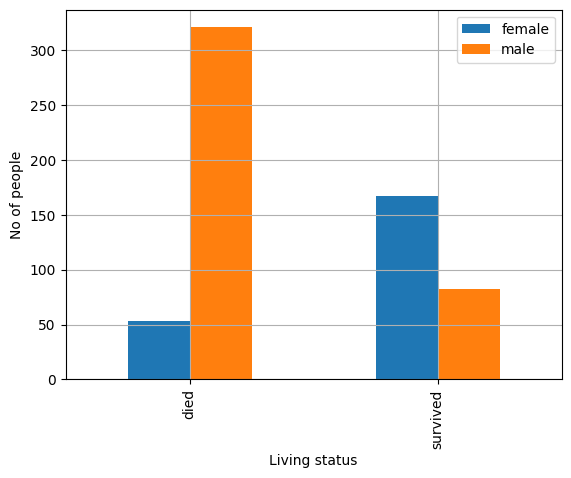

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
x.plot(kind='bar')
plt.grid(True)
plt.ylabel("No of people")
plt.xlabel("Living status")

#### graph showing male and female survival status per total number of male and female respectively

In [210]:
total_males = X_train[X_train["Sex"] == 1].shape[0]
total_females = X_train[X_train["Sex"] == 0].shape[0]
print(f"Total male: {total_males}\nTotal females: {total_females}")

Total male: 403
Total females: 220


            female      male
died      0.240909  0.796526
survived  0.759091  0.203474


Text(0.5, 0, 'Living status')

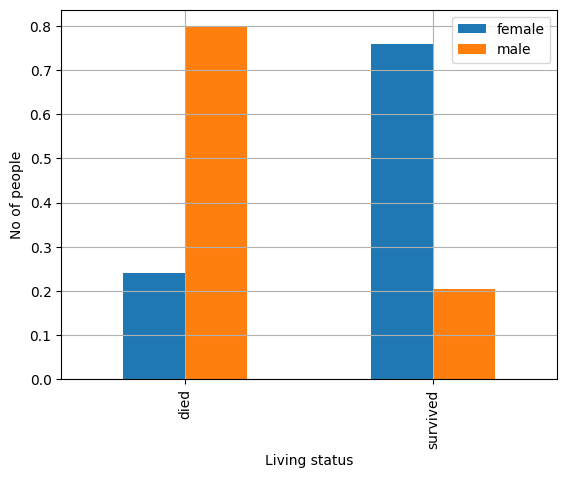

In [211]:
x["female"] = x["female"]/total_females
x["male"] = x["male"]/total_males
print(x)
%matplotlib inline
import matplotlib.pyplot as plt
x.plot(kind='bar')
plt.grid(True)
plt.ylabel("No of people")
plt.xlabel("Living status")

Surprisingly it is seen that almost 80% males died while almost 75% females survived